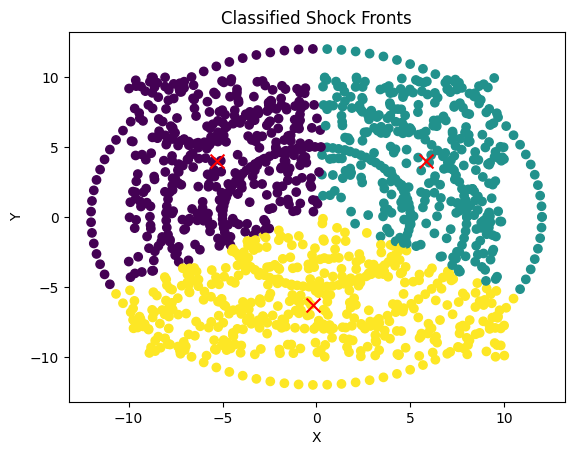

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
num_points = 1000
x = np.random.uniform(-10, 10, num_points)
y = np.random.uniform(-10, 10, num_points)

# Define a function to generate a shock front
def generate_shock_front(x_center, y_center, radius, num_points):
    theta = np.linspace(0, 2*np.pi, num_points)
    x = x_center + radius * np.cos(theta)
    y = y_center + radius * np.sin(theta)
    return x, y

# Generate shock front data
shock_front1 = generate_shock_front(0, 0, 5, 100)
shock_front2 = generate_shock_front(0, 0, 8, 100)
shock_front3 = generate_shock_front(0, 0, 12, 100)

# Combine all data
data = np.column_stack((x, y))
data = np.vstack((data, np.column_stack(shock_front1)))
data = np.vstack((data, np.column_stack(shock_front2)))
data = np.vstack((data, np.column_stack(shock_front3)))

# Use KMeans clustering to classify shock fronts
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

# Plot the data and classified clusters
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')
plt.title('Classified Shock Fronts')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
